# BluePoints
🐋 Transforme lixo em pontos
<br>
Pontos em recompensas
<br>
Gere um mundo mais azul 💙

<br>

**📍 Aviso Importante:** o conteúdo abaixo é um MVP da solução e a conexão à interface da aplicação é simulada.

<br>

**💡 Nota:** o nome image_file deve ser alterado nos códigos abaixo pelo caminho adequado da sua imagem

# API do Roboflow
Habilitando o uso do modelo do Roboflow no Colab. Aqui é possível testar localmente com upload de imagens na pasta content.

<br>

As classes reconhecíveis são: cardboard, bottleCap, glass, metal e paper

In [1]:
# Instalando inferência
!pip install inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.4/412.4 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.5/325.5 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
# Instalando supervisão
!pip install supervision

In [3]:
# Importando os pacotes necessários
import supervision as sv
import cv2

from inference import get_roboflow_model
from inference import get_model
from collections import Counter

In [6]:
# Habilitando uso do modelo
image_file = "/1.png"
image = cv2.imread(image_file)

model = get_roboflow_model(model_id="bluepoints/1", api_key= "v3ouFVD24hflkTp7UR8i")

results = model.infer(image)

detections = sv.Detections.from_inference(results[0].dict(by_alias=True, exclude_none=True))

In [8]:
# Carregando um modelo e visualizando inferência
image = "/1.png"

model = get_model(model_id="bluepoints/1")

results = model.infer(image)

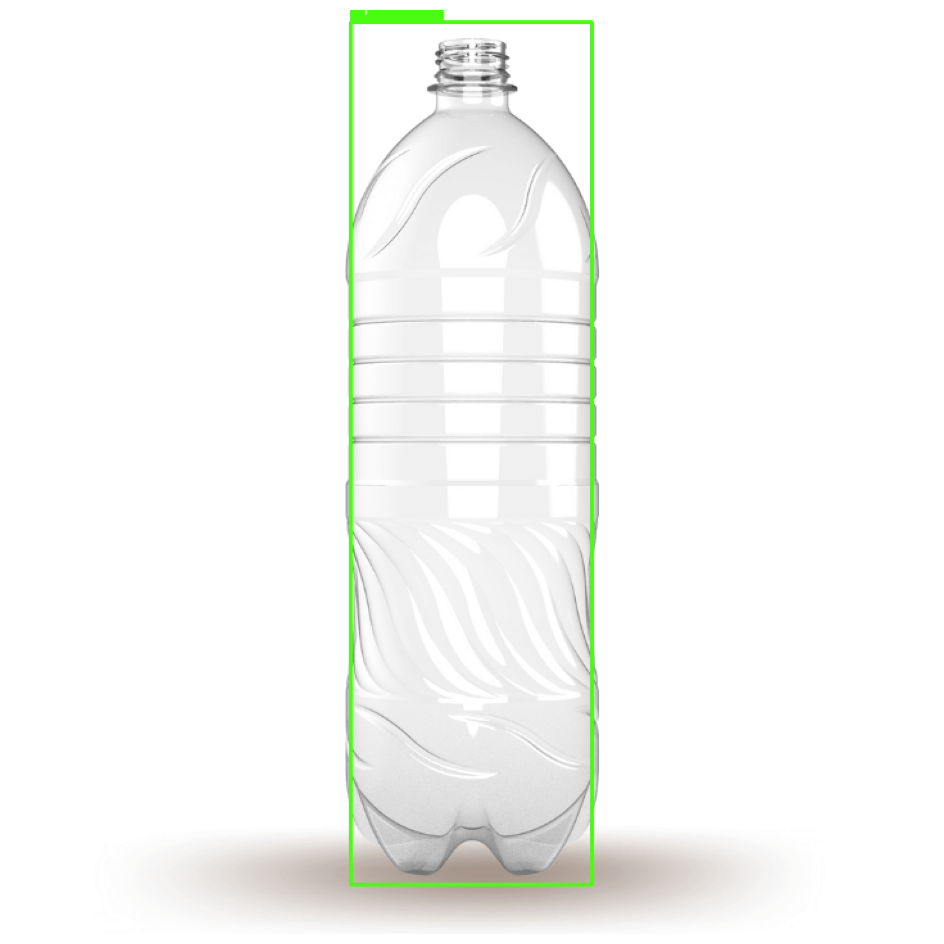

In [9]:
# Visualizando resultados do reconhecimento de imagem
image_file = "/1.png"
image = cv2.imread(image_file)

model = get_model(model_id="bluepoints/1")

results = model.infer(image)

detections = sv.Detections.from_inference(results[0].dict(by_alias=True, exclude_none=True))

bounding_box_annotator = sv.BoundingBoxAnnotator()
label_annotator = sv.LabelAnnotator()

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)

# Atribuição de pontos
Atribuindo pontos conforme dados identificados na imagem

In [12]:
def funcao_pontos():
  '''Função de extração de pontos do output do modelo de reconhecimento de objeto.'''

  # detectando o nome da classe
  for detection in detections:
    class_name = detection[5]['class_name']

  # detectando a quantidade de objetos identificados
  classes = [detection[5]['class_name'] for detection in detections]
  counts = Counter(classes)

  # printando resultdo de cada detecção
  for class_name, count in counts.items():
      print(f"Detectamos {count} objeto de: {class_name}")


  if class_name == 'bottleCap':
    points_calculated = 1000
  elif class_name == 'cardboard':
    points_calculated = 30
  elif class_name == 'cup':
    points_calculated = 2000
  elif class_name == 'glass':
    points_calculated = 500
  elif class_name == 'metal':
    points_calculated = 750
  elif class_name == 'paper':
    points_calculated = 10
  elif class_name == 'plastic':
    points_calculated = 1000
  else:
    points_calculated = 0
  print(f'Os seus pontos são: {points_calculated}')

In [13]:
# retornando os pontos da pessoa
pontos = funcao_pontos()

Detectamos 1 objeto de: plastic
Os seus pontos são: 1000


# Conectando Python ao BD
Os dados a serem extraídos da imagem serão retornados ao banco de dados a fim de que o usuário possa consultar os pontos conseguidos após upload de cada imagem tirada de suas coletas.

In [15]:
# instalando a biblioteca OracleDB
!pip install oracledb

In [16]:
# importando bibliotecas
from flask import Flask, request, jsonify
import oracledb

In [17]:
def tranforma_em_ponto(caminho_da_imagem):
    '''Função que transforma os dados da imagem  captada no aplicativo em pontos'''
    pontos = funcao_pontos
    return pontos

In [18]:
# Conectando os dados reconhecidos da imagem ao Banco de Dados
app = Flask(__name__)
# Rota de exemplo
@app.route('/')
def home():
    return "ROTA NULA"

# Rota para receber dados via POST
@app.route('/dados', methods=['POST'])
def post_dados():
  '''Função para cadastro de pontos no banco de dados'''
  novo_dado = request.get_json()
  print(novo_dado)
  id_desejado_string = novo_dado["id_pessoa"]
  print(id_desejado_string)
  id_desejado_int = int(id_desejado_string)
  print(id_desejado_int)

  # Conexao com o banco
  conn = oracledb.connect(user="rm552295",
                          password="050405",
                          host="oracle.fiap.com.br",
                          port=1521,
                          service_name="ORCL")
  cursor = conn.cursor()

  # Aqui pesquisa as fotos ainda não avaliadas da pessoa que a ana mandar
  cursor.execute(f"SELECT * FROM TB_BP_RECICLAGEM WHERE usuario = {id_desejado_int} and validado = 0")
  resultado = cursor.fetchall()
  print(resultado)
  for imagem in resultado: # Aqui vai ter um laço para CADA a reciclagem não consultada da pessoa em questão
      id_usuario = imagem[4]
      cursor.execute(f"SELECT * FROM TB_BP_USUARIO WHERE pessoa = {id_pessoa}")
      lista_usuarios = cursor.fetchall()
      id_pessoa = lista_usuarios[0][3]

      cursor.execute(f"SELECT * FROM TB_BP_PESSOA WHERE id_pessoa = {id_pessoa}")
      lista_pessoa = cursor.fetchall()
      pontos_atuais  = lista_pessoa[0][1] # Recupera os pontos atuais da pessoa

      id_foto = imagem[1] # Id para foto
      cursor.execute(f"SELECT * FROM TB_BP_FOTO WHERE id_foto = {id_foto}")
      todas_fotos = cursor.fetchall()
      caminho_foto = todas_fotos[0][1] # Recupera o caminho salvo no banco

      print(caminho_foto) # ISSO AQUI É O CAMINHO
      pontos_adiquiridos = tranforma_em_ponto(caminho_foto)
      cursor.execute(f"UPDATE TB_BP_RECICLAGEM SET validado = 1, pontos = {pontos_adiquiridos} WHERE foto = {id_foto}") # Atualizo os pontos da reciclagem
      novos_pontos = pontos_atuais + pontos_adiquiridos # Somo os pontos da reciclagem com os que a pessoa já tinha
      cursor.execute(f"UPDATE TB_BP_PESSOA SET pontos = {novos_pontos} WHERE id_pessoa = {id_pessoa}") # Atualizo os pontos da pessoa

      conn.commit() # Dou um commit pra salvar tudo feito

  return jsonify("Enviado com sucesso para python"), 201

if __name__ == '__main__':
    app.run(debug=True, port=5000)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat


Abaixo um exemplo de conexão com o FrontEnd representativo da Etapa 05 do projeto, apresentado no Pitch. O objetivo é ilustrar a integração entre os componentes e demonstrar o potencial de desenvolvimento e colaboração da solução ao futuro da sustentabilidade com Deep Learning.

In [ ]:
# Fetch no aplicativo em React Native
"""

// Exemplo de solicitação POST
fetch('http://localhost:5000/dados', {
method: 'POST',
headers: {
    'Content-Type': 'application/json',
},
body: JSON.stringify({
    id_pessoa: 'id_da_pessoa_ativa_na_conta_neste_momento',
}),
})
.then(response => response.json())
.then(data => {
    console.log('Resposta do servidor:', data);
})
.catch(error => {
    console.error('Erro:', error);
});
"""

# Conclusão
A acurácia de identificação dos itens é de 78% e junto à solução proposta traz uma nova forma de engajar a população a contribuir com a preservação da biodiversidade por meio da pontuação pelo esforço empregado em recolhimento do lixo. Futuramente, o modelo se aplicará a ambientes urbanizados e florestais, expandindo a proteção ambiental.